In [3]:
import pandas as pd 
import numpy as np
from GeoTree import GeoTreeRegressor

In [4]:
data = pd.read_csv('GeoTree/examples/meuse.csv', index_col=0)

In [5]:
data

,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,dist.m,part.a,part.b,SW_occurrence,AHN,LGN5,x,y
index,,,,,,,,,,,,,,,,,,
0,11.7,85.0,299.0,1022.0,7.909,0.001358,13.6,1.0,1.0,1.0,50.0,1.0,0.0,24.0,3214.0,2.0,181060.0,333620.0
1,8.6,81.0,277.0,1141.0,6.983,0.012224,14.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,3402.0,6.0,181020.0,333540.0
2,6.5,68.0,199.0,640.0,7.800,0.103029,13.0,1.0,1.0,1.0,150.0,1.0,0.0,0.0,3277.0,6.0,181180.0,333540.0
3,2.6,81.0,116.0,257.0,7.655,0.190094,8.0,1.0,2.0,0.0,270.0,1.0,0.0,0.0,3563.0,1.0,181300.0,333500.0
4,2.8,48.0,117.0,269.0,7.480,0.277090,8.7,1.0,2.0,0.0,380.0,1.0,0.0,0.0,3406.0,6.0,181300.0,333340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.8,20.0,49.0,166.0,8.128,0.423837,4.7,3.0,1.0,0.0,540.0,0.0,1.0,0.0,3801.0,1.0,179180.0,330180.0
151,3.1,39.0,173.0,496.0,8.577,0.423837,9.1,3.0,1.0,0.0,520.0,0.0,1.0,13.0,3763.0,1.0,179100.0,330300.0
152,2.1,31.0,119.0,342.0,8.429,0.277090,6.5,3.0,1.0,0.0,350.0,0.0,1.0,0.0,3663.0,23.0,178860.0,330300.0


In [6]:
data.corr()

,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,dist.m,part.a,part.b,SW_occurrence,AHN,LGN5,x,y
cadmium,1.000000,0.925450,0.798947,0.916214,-0.565227,-0.615648,0.730784,-0.470431,-0.389142,0.699837,-0.619684,0.169456,-0.169456,0.238028,-0.521455,0.267581,0.036724,0.237166
copper,0.925450,1.000000,0.818307,0.908270,-0.581397,-0.608658,0.734717,-0.463821,-0.380906,0.686292,-0.613446,0.156906,-0.156906,0.207769,-0.546363,0.300255,0.010480,0.264241
lead,0.798947,0.818307,1.000000,0.954691,-0.587481,-0.577586,0.553501,-0.389665,-0.438741,0.510682,-0.585209,0.086713,-0.086713,0.167066,-0.340797,0.173452,-0.158740,0.070333
zinc,0.916214,0.908270,0.954691,1.000000,-0.596631,-0.643977,0.684258,-0.404380,-0.460482,0.645221,-0.656989,0.098183,-0.098183,0.218525,-0.419461,0.236488,-0.122238,0.117886
elev,-0.565227,-0.581397,-0.587481,-0.596631,1.000000,0.530102,-0.356162,0.428059,0.502231,-0.441019,0.508385,0.160338,-0.160338,-0.166564,0.260998,-0.180031,0.299749,0.105201
dist,-0.615648,-0.608658,-0.577586,-0.643977,0.530102,1.000000,-0.566804,0.268568,0.659561,-0.519042,0.984017,-0.084566,0.084566,-0.205001,0.366877,-0.279344,0.115608,-0.188206
om,0.730784,0.734717,0.553501,0.684258,-0.356162,-0.566804,1.000000,-0.249509,-0.438980,0.606624,-0.589022,0.003807,-0.003807,0.147555,-0.379666,0.362978,-0.038420,0.168408
ffreq,-0.470431,-0.463821,-0.389665,-0.404380,0.428059,0.268568,-0.249509,1.000000,0.035416,-0.404471,0.258173,-0.513064,0.513064,0.052650,0.628566,-0.053541,-0.436716,-0.634791
soil,-0.389142,-0.380906,-0.438741,-0.460482,0.502231,0.659561,-0.438980,0.035416,1.000000,-0.380514,0.634146,0.135833,-0.135833,-0.170133,0.107829,-0.226283,0.405085,0.117507
lime,0.699837,0.686292,0.510682,0.645221,-0.441019,-0.519042,0.606624,-0.404471,-0.380514,1.000000,-0.542710,0.012188,-0.012188,0.176931,-0.437543,0.270899,-0.081588,0.178435


In [7]:
X = data[['x','y','dist']]
y = np.log(data['zinc'])

In [8]:
geotree = GeoTreeRegressor()
geotree.fit(X, y, geo_features=[0,1])

GeoTreeRegressor()

In [9]:
grid = pd.read_csv('/Users/margotgeerts/Desktop/GeoTree/examples/meusegrid.csv', index_col=0)
grid

,part.a,part.b,dist,soil,ffreq,SW_occurrence,AHN,LGN5,x,y
0,1,0,0.000000,1,1,13,3168.0,16,181180,333740
1,1,0,0.000000,1,1,0,3292.0,16,181140,333700
2,1,0,0.012224,1,1,0,3318.0,1,181180,333700
3,1,0,0.043468,1,1,0,3372.0,1,181220,333700
4,1,0,0.000000,1,1,25,3187.0,6,181100,333660
...,...,...,...,...,...,...,...,...,...,...
3096,0,1,0.001358,1,1,0,3497.0,23,178980,329620
3097,0,1,0.005432,1,1,0,3535.0,23,179020,329620
3098,0,1,0.005432,1,1,0,3529.0,23,179060,329620
3099,0,1,0.000000,1,1,0,3519.0,23,179100,329620


In [10]:
grid = grid[['x','y','dist']]

In [11]:
preds = geotree.predict(grid)

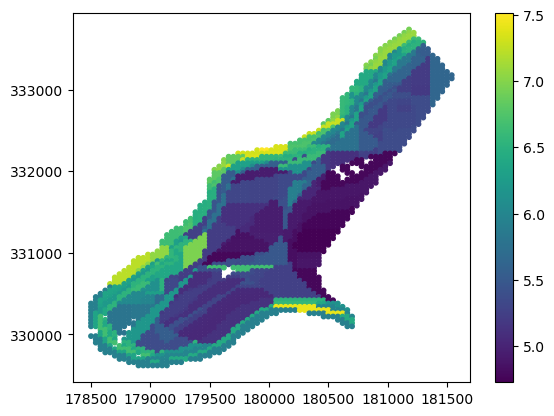

In [12]:
import matplotlib.pyplot as plt
plt.scatter(grid['x'], grid['y'], c=preds, s=10)
plt.colorbar()